# Python Machine learning homework 12d3
Use the car sales data included in file car_dekho_details.csv.

We want you to build a linear regression model to predict the selling_price of a car in both in Python and in R.

Do some basic data exploration in Python (you may wish to use pandas_profiling for this if it works for you)

Create a basic model in Python with all predictors except name (and without transformation). Use sklearn for this.

Create a similar basic model in R (again all predictors except name, without transformation)

Write a short paragraph comparing what was easy and what was difficult in both languages.

Interpret the model.

In [1]:
import pandas as pd



In [2]:
car_sales = pd.read_csv("car_dekho_details.csv")
car_sales

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [27]:
##realised I hadn'r dropped name column too late

car_sales.drop(['name'], axis =1, inplace = True)

# dropping columns 


KeyError: "['name'] not found in axis"

In [3]:
car_sales.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_sales.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
import pandas_profiling

pandas_profiling.ProfileReport(car_sales)

In [8]:
#create dummies
car_sales = pd.get_dummies(car_sales, drop_first = True)

car_sales.head()

,year,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [9]:
#build model
from sklearn.linear_model import LinearRegression

In [10]:
y = car_sales["selling_price"]
X = car_sales.drop(columns = "selling_price")

In [11]:
#define model and fit it
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [12]:
model.score(X, y)

0.9802520470875263

In [14]:
model.intercept_

-54522795.374382876

In [15]:
model.coef_

array([ 2.76899384e+04, -5.20001670e-01,  4.79682887e+04, ...,
       -1.69797640e+04,  9.81276382e+04, -2.33830387e+04])

In [16]:
#combine coeffs
pd.DataFrame(
  {
  "Variable" : X.columns.values,
  "Coefficient" : model.coef_
  }
)

,Variable,Coefficient
0,year,27689.938440
1,km_driven,-0.520002
2,name_Ambassador Classic 2000 Dsz,47968.288671
3,name_Ambassador Grand 1800 ISZ MPFI PW CL,194814.737210
4,name_Audi A4 1.8 TFSI,63464.585786
...,...,...
1498,transmission_Manual,-912953.441748
1499,owner_Fourth & Above Owner,-15478.121503
1500,owner_Second Owner,-16979.763971
1501,owner_Test Drive Car,98127.638163


In [17]:
import statsmodels.api as sm
X_i = sm.add_constant(X)

X_i.head()

,const,year,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1.0,2007,70000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,1.0,2007,50000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,1.0,2012,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2017,46000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,1.0,2014,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [18]:
sm_model = sm.OLS(y, X_i).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     94.14
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:52:35   Log-Likelihood:                -55225.
No. Observations:                4340   AIC:                         1.134e+05
Df Residuals:                    2841   BIC:                         1.230e+05
Df Model:                        1498                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Text(0, 0.5, 'Residual')

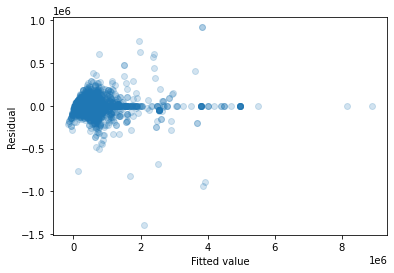

In [19]:
#diagnostic plot
residuals = sm_model.fittedvalues - y

import matplotlib.pyplot as plt
plt.scatter(x = sm_model.fittedvalues, y = residuals, alpha = 0.2)
plt.xlabel("Fitted value")
plt.ylabel("Residual")

((array([-3.59903748, -3.36147262, -3.23042318, ...,  3.23042318,
          3.36147262,  3.59903748]),
  array([-1390772.53198929,  -940911.01233742,  -890085.86395031, ...,
           760194.73481981,   915498.43814641,   915498.43814641])),
 (69125.53248188803, -2.135515126393409e-06, 0.8496861378603151))

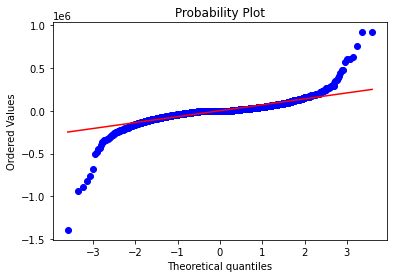

In [20]:
#qq plot
import scipy as sp
sp.stats.probplot(residuals, dist = "norm", plot = plt, fit = True)